In [98]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from operator import itemgetter
from nltk.tokenize import TweetTokenizer

In [88]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=True):
    tknzr = TweetTokenizer()
    ttokens = tknzr.tokenize(s)
    
    tokens = tokenize(" ".join(ttokens))
    if lowercase:
        #tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
        tokens = [token.lower() for token in tokens if token.isalpha()]
        tokens = set(tokens)
    return list(tokens)
 
tweet = 'RT  Example @marcobonzanini: just an example! :D http://example.com #NLP\u2025'
print(preprocess(tweet))
# ['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://exampl

[u'rt', u'example', u'just', u'an']


In [89]:
stoplist = set([line.replace("\n","") for line in open('/Users/ynh3/Data/stopword-list2.txt')])
pun = [',', '-','.', ':', '(', ')', '--', ';', '...', '?','today','follow','stats','can', 'say', 'says', 'will','may', 'must', 'us', 'via','a','the', 'rt', 'gg', 'gt', 'lt', 'la', 'de', 'te', 'lol', 'follow', 'followers', 'unfollow', 'unfollowers', 'unfollower', 'follower']

with open('/Users/ynh3/Data/common_list.txt','rt') as myfile:
    common_word = myfile.read().splitlines()


In [100]:
tweets_data_path = '/Users/ynh3/Data/TweetsGZ/04-03/statuses.log.2015-04-03-00.json'

tweets_data = []
com = defaultdict(lambda : defaultdict(int))

search_word = 'obama'

tweets_file = open(tweets_data_path, "r")
count = 0
for line in tweets_file:
    try:
        tweet = json.loads(line)
        if "lang" in tweet:
            if tweet["lang"] == 'en' and "text" in tweet:
                tweets_data.append(tweet)
                count += 1
                
                       
                terms_only = [term for term in preprocess(tweet['text']) 
                      if term not in stoplist and term not in common_word and term not in pun
                      and not term.startswith(('#', '@')) and 'http' not in term]
                
                #if count < 20: 
                #    print tweet['text']
                #    print terms_only
                
                for i in range(len(terms_only)-1):            
                    for j in range(i+1, len(terms_only)):
                        w1, w2 = sorted([terms_only[i], terms_only[j]])                
                        if w1 != w2:
                            com[w1][w2] += 1
                if search_word in terms_only:
                    count_search.update(terms_only)

    except:
        continue

In [91]:
len(tweets_data)

63059

In [92]:
com[0]

defaultdict(int, {})

In [102]:
com_max = []
# For each term, look for the most common co-occurrent terms
for t1 in com:
    t1_max_terms = sorted(com[t1].items(), key=itemgetter(1), reverse=True)[:5]
    for t2, t2_count in t1_max_terms:
        com_max.append(((t1, t2), t2_count))
# Get the most frequent co-occurrences
terms_max = sorted(com_max, key=itemgetter(1), reverse=True)
print(terms_max[:100])

[((u'full', u'read'), 308), ((u'just', u'want'), 213), ((u'ebay', u'full'), 208), ((u'ebay', u'read'), 208), ((u'fifth', u'harmony'), 171), ((u'just', u'know'), 119), ((u'gain', u'retweet'), 116), ((u'automatically', u'checked'), 114), ((u'back', u'just'), 107), ((u'harry', u'styles'), 104), ((u'happy', u'mama'), 103), ((u'asked', u'prom'), 101), ((u'break', u'spring'), 101), ((u'care', u'don'), 100), ((u'asked', u'being'), 100), ((u'came', u'dad'), 99), ((u'being', u'dad'), 98), ((u'being', u'came'), 97), ((u'asked', u'came'), 96), ((u'being', u'thinking'), 95), ((u'being', u'prom'), 95), ((u'came', u'thinking'), 95), ((u'came', u'prom'), 95), ((u'asked', u'dad'), 95), ((u'asked', u'thinking'), 95), ((u'dad', u'thinking'), 95), ((u'dad', u'prom'), 95), ((u'prom', u'thinking'), 95), ((u'deal', u'iran'), 94), ((u'being', u'pranking'), 93), ((u'pranking', u'thinking'), 93), ((u'pranking', u'prom'), 93), ((u'came', u'pranking'), 93), ((u'dad', u'pranking'), 93), ((u'automatically', u'foll

In [101]:
print("Co-occurrence for %s:" % search_word)
print(count_search.most_common(20))

Co-occurrence for obama:
[(u'obama', 131), (u'iran', 48), (u'deal', 31), (u'president', 21), (u'netanyahu', 20), (u'barack', 17), (u'nuclear', 16), (u'israel', 14), (u'survival', 10), (u'framework', 9), (u'know', 8), (u'benjamin', 7), (u'prime', 7), (u'agreement', 7), (u'threatens', 6), (u'tells', 6), (u'just', 6), (u'historic', 6), (u'thursday', 5), (u'sasha', 5)]


In [103]:
##changing to data frame PANDAS and do some analysis

tweets = pd.DataFrame()

In [104]:
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

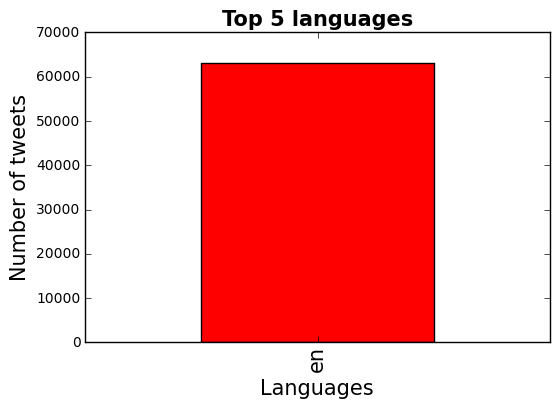

In [105]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

In [106]:
%matplotlib inline

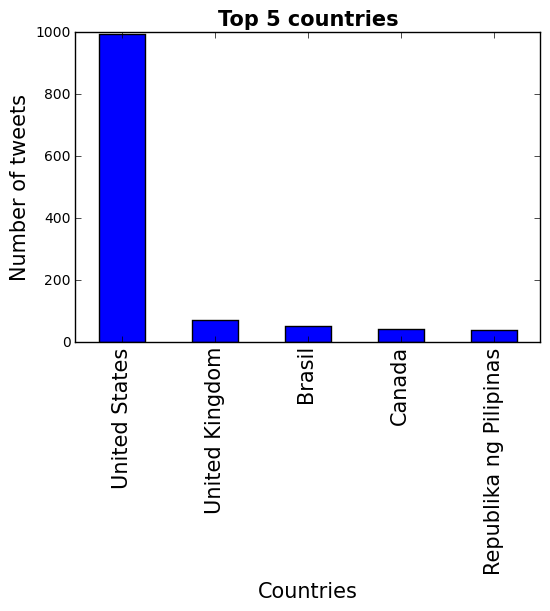

In [107]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')